In [10]:
# NOAA GML DATA - CO2 monthly average globally

url='https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_gl.txt'

# local data
f='../data_external/rajarshi/co2.txt'

In [11]:
# downloading data

import os
import urllib
import shutil

if not os.path.isdir('../data_external/rajarshi/'):
    os.mkdir('../data_external/rajarshi/')

r = urllib.request.urlopen(url)
fo = open(f, 'wb')
shutil.copyfileobj(r, fo)
fo.close()

In [12]:
# opening the data

lines = open(f, 'r').readlines()

In [13]:
time=[] ; avg=[]

In [14]:
# munging the data to get the data into arrays

for line in lines:
    if line.startswith('#') or len(line.strip())==0:
        continue  # skipping comments and empty lines

    data=line.split()

    time.append(float(data[2]))
    avg.append(float(data[3]))

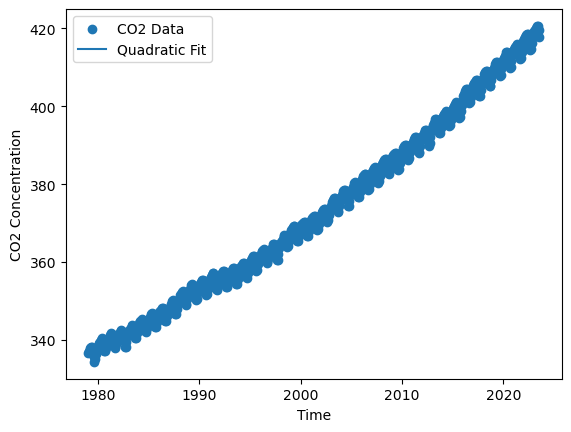

Rate of change at t = 5 : -61.33858451727884
No, the rate of increase of CO2 is not increasing significantly.


In [15]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

co2_concentration = avg

# Define the quadratic function
def quadratic_function(t, a, b, c):
    return a * t**2 + b * t + c

# Fit the quadratic curve to the data
params, covariance = curve_fit(quadratic_function, time, co2_concentration)

# Extract the coefficients
a, b, c = params

# Derivative of the quadratic function
def derivative(t, a, b):
    return 2 * a * t + b

# Estimate the rate of change (derivative) at a specific time (e.g., t=5)
t_value = 5
rate_of_change = derivative(t_value, a, b)

# Provide a "yes or no" answer to the policy-maker
if rate_of_change > 0:
    result = "Yes, the rate of increase of CO2 is increasing."
else:
    result = "No, the rate of increase of CO2 is not increasing significantly."

# Plot the data and the quadratic fit
plt.scatter(time, co2_concentration, label="CO2 Data")
t_fit = np.linspace(min(time), max(time), 100)
co2_fit = quadratic_function(t_fit, a, b, c)
plt.plot(t_fit, co2_fit, label="Quadratic Fit")
plt.xlabel("Time")
plt.ylabel("CO2 Concentration")
plt.legend()
plt.show()

print("Rate of change at t =", t_value, ":", rate_of_change)
print(result)
